In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(1)

# Number of data points we want to use:
n_data = 20
# Range of X values
X_train = np.random.uniform(-4,4,(n_data))
# Range of noise
noise = np.random.normal(0.0,9,(n_data))
# Computed y values
y_train = [X_train[i]**3 + noise[i] for i in(range(len(X_train)))]

act = 'relu'
width = 128

In [2]:
from ProbabilisticReachability import *
from ProbabilisticReachability import interval_bound_propagation
from ProbabilisticReachability import linear_propogation

set_width(128)
"""
p_ibp = interval_bound_propagation([[0.0]], [[-1],[1]], [[-18],[18]], 
                           w_margin=1.0, 
                           act = act, 
                           search_samps = 250)
print p_ibp
p_lin = linear_propogation([[0.0]], [[-1],[1]], [[-18],[18]], 
                           w_margin=1.0, 
                           act = act, 
                           search_samps = 250)
print p_lin
"""

/usr/local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'\np_ibp = interval_bound_propagation([[0.0]], [[-1],[1]], [[-18],[18]], \n                           w_margin=1.0, \n                           act = act, \n                           search_samps = 250)\nprint p_ibp\np_lin = linear_propogation([[0.0]], [[-1],[1]], [[-18],[18]], \n                           w_margin=1.0, \n                           act = act, \n                           search_samps = 250)\nprint p_lin\n'

In [3]:

result_ibp = np.zeros((3,3))
map_ibp = []
n = [0.15, 0.3, 0.45]
d = [6, 9, 12]
for i in range(3):
    for j in range(3):
        print [n[i], d[j]]
        p_ibp = interval_bound_propagation([[0.0]], [[-1*n[i]],[n[i]]], [[-1*d[j]],[d[j]]], 
                           w_margin=0.75, 
                           act = act, 
                           search_samps = 300)
        result_ibp[i][j] = p_ibp
        map_ibp.append([n[i], d[j]])


 12%|█▏        | 37/300 [00:00<00:00, 366.95it/s]

[0.15, 6]


100%|██████████| 300/300 [00:00<00:00, 365.39it/s]


We found 91 many valid intervals.


 12%|█▏        | 37/300 [00:00<00:00, 362.34it/s]

[0.15, 9]


100%|██████████| 300/300 [00:00<00:00, 370.93it/s]


We found 297 many valid intervals.


 12%|█▏        | 37/300 [00:00<00:00, 369.22it/s]

[0.15, 12]


100%|██████████| 300/300 [00:00<00:00, 370.65it/s]


We found 300 many valid intervals.


 12%|█▏        | 37/300 [00:00<00:00, 369.70it/s]

[0.3, 6]


  0%|          | 0/300 [00:00<?, ?it/s]

We found 17 many valid intervals.
[0.3, 9]


100%|██████████| 300/300 [00:00<00:00, 377.18it/s]


We found 287 many valid intervals.


  8%|▊         | 23/300 [00:00<00:01, 227.40it/s]

[0.3, 12]


100%|██████████| 300/300 [00:01<00:00, 270.19it/s]


We found 300 many valid intervals.


 12%|█▏        | 37/300 [00:00<00:00, 365.29it/s]

[0.45, 6]


 11%|█         | 33/300 [00:00<00:00, 324.08it/s]

We found 0 many valid intervals.
[0.45, 9]


100%|██████████| 300/300 [00:00<00:00, 345.36it/s]


We found 223 many valid intervals.


  0%|          | 0/300 [00:00<?, ?it/s]

[0.45, 12]


100%|██████████| 300/300 [00:01<00:00, 234.97it/s]


We found 298 many valid intervals.


[[3.46023560e-01 7.82128925e-01 7.86799091e-01]
 [3.07749626e-05 7.56463169e-01 7.88111491e-01]
 [0.00000000e+00 7.10702947e-01 7.74780460e-01]]
[[ -1.06124841  -0.24573569  -0.23978235]
 [-10.3888091   -0.27910143  -0.23811571]
 [        -inf  -0.34150073  -0.25517557]]
[[0.15, 6], [0.15, 9], [0.15, 12], [0.3, 6], [0.3, 9], [0.3, 12], [0.45, 6], [0.45, 9], [0.45, 12]]


/Users/matthewwicker/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


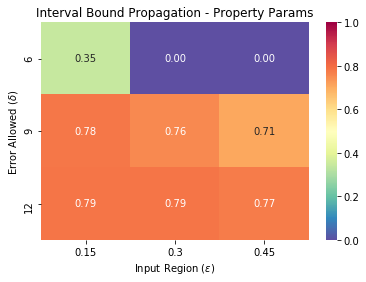

In [4]:
import seaborn as sns
print result_ibp
print np.log(result_ibp)
#plt.imshow(np.transpose(result_lin), norm=matplotlib.colors.LogNorm(), cmap='cividis')
#plt.imshow(np.transpose(result_ibp), cmap='Spectral_r')
sns.heatmap(np.transpose(result_ibp) ,
            annot=True, fmt=".2f", 
            cmap='Spectral_r', vmin=0, vmax=1,
           xticklabels=n, yticklabels=d)
#plt.colorbar()
#plt.xticks([0,1,2], n)
#plt.yticks([0,1,2], d)
print map_ibp
plt.title('Interval Bound Propagation - Property Params')
plt.ylabel(r'Error Allowed ($\delta$)')
plt.xlabel(r'Input Region ($\epsilon$)')
#plt.clim(0,1.0)
plt.show()


In [5]:
result_lin = np.zeros((3,3))
n = [0.15, 0.3, 0.45]
d = [6, 9, 12]
for i in range(3):
    for j in range(3):
        print i, j
        p_ibp = linear_propogation([[0.0]], [[-1*n[i]],[n[i]]], [[-1*d[j]],[d[j]]], 
                           w_margin=1.25, 
                           act = act, 
                           search_samps = 200)
        result_lin[i][j] = p_ibp

  4%|▎         | 7/200 [00:00<00:03, 61.83it/s]

0 0


100%|██████████| 200/200 [00:04<00:00, 47.47it/s]


We found 118 many valid intervals.


  2%|▏         | 4/200 [00:00<00:05, 37.29it/s]

0 1


100%|██████████| 200/200 [00:03<00:00, 57.11it/s]


We found 200 many valid intervals.


  4%|▎         | 7/200 [00:00<00:03, 63.72it/s]

0 2


100%|██████████| 200/200 [00:03<00:00, 60.99it/s]


We found 200 many valid intervals.


  3%|▎         | 6/200 [00:00<00:03, 59.84it/s]

1 0


  4%|▎         | 7/200 [00:00<00:03, 61.90it/s]

We found 11 many valid intervals.
1 1


100%|██████████| 200/200 [00:04<00:00, 42.92it/s]


We found 198 many valid intervals.


  3%|▎         | 6/200 [00:00<00:03, 59.85it/s]

1 2


100%|██████████| 200/200 [00:03<00:00, 55.27it/s]


We found 200 many valid intervals.


  3%|▎         | 6/200 [00:00<00:03, 59.75it/s]

2 0


  4%|▎         | 7/200 [00:00<00:03, 60.98it/s]

We found 0 many valid intervals.
2 1


100%|██████████| 200/200 [00:04<00:00, 47.95it/s]


We found 136 many valid intervals.


  4%|▎         | 7/200 [00:00<00:03, 61.74it/s]

2 2


100%|██████████| 200/200 [00:03<00:00, 60.81it/s]


We found 200 many valid intervals.


[[0.86921313 0.93827156 0.93428807]
 [0.00979864 0.93858866 0.93919476]
 [0.         0.90243408 0.94244518]]


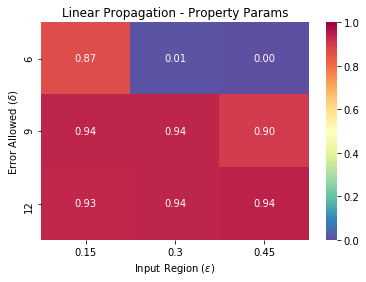

In [6]:
print result_lin
#plt.imshow(np.transpose(result_lin), cmap='cividis')
sns.heatmap(np.transpose(result_lin) , annot=True, 
            fmt=".2f", cmap='Spectral_r', vmin=0, vmax=1,
           xticklabels=n, yticklabels=d)

#plt.xticks([0,1,2], n)
#plt.yticks([0,1,2], d)
plt.title('Linear Propagation - Property Params')
plt.ylabel(r'Error Allowed ($\delta$)')
plt.xlabel(r'Input Region ($\epsilon$)')
#plt.clim(0.13,0.42)
plt.show()